# Health Insurance Claim

### DESCRIPTION

Health insurance has become an indispensable part of our lives in recent years, and people are paying for it so that they are covered in the event of an accident or other unpredicted factors.
You are provided with medical costs dataset that has features such as Age, Cost, BMI.

### Objective:

Determine the factors that contribute the most in the calculation of insurance costs.
Predict the health Insurance claim.

مطلوب مني: اشوف العوامل الي تاثر في حساب قيمة التأمين ( تحليل وصفي) 
بعدين أسوي مودل يتوقع الموافقة عالتأمين

### Actions to Perform:

1- Find the correlation of every pair of features (and the outcome variable).

2- Visualize the correlations using a heatmap.

3- Normalize your inputs.

4- Use the test data to find out the accuracy of the model.

5- Visualize how your model uses the different features and which features have a greater effect.


In [4]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [59]:
df= pd.read_csv('insurance2.csv')

## Exploring The Data

In [60]:
df.sample(5)

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
451,30,1,24.13,1,0,1,4032.2407,0
120,44,1,37.10,2,0,3,7740.3370,1
111,55,0,29.70,2,0,3,11881.3580,1
73,58,1,32.01,1,0,2,11946.6259,1
794,39,0,31.92,2,0,1,7209.4918,0


In [10]:
df.isna().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


<AxesSubplot:>

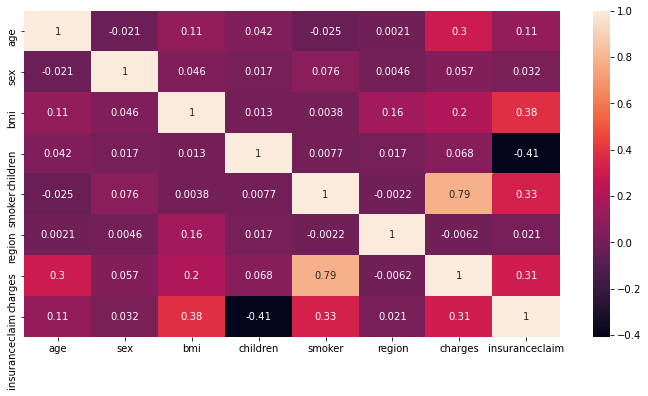

In [13]:
plt.figure(figsize = (12,6))
sns.heatmap(df.corr(),annot = True)

In [61]:
#Transform Dummy Variable Region
df['isNorthEast'] = np.where(df['region'] == 0,1,0) #np.where(condition,x,y) for condition where true yield x as yield y
df['isNorthWest'] = np.where(df['region'] == 1,1,0)
df['isSouthEast'] = np.where(df['region'] == 2,1,0)
df['isSouthWest'] = np.where(df['region'] == 3,1,0)

#Drop the region column
df = df.drop('region', axis = 1)

In [62]:
df.sample(5)

,age,sex,bmi,children,smoker,charges,insuranceclaim,isNorthEast,isNorthWest,isSouthEast,isSouthWest
1105,54,0,31.240,0,0,10338.93160,1,0,0,1,0
1303,43,1,27.800,0,1,37829.72420,1,0,0,0,1
1225,33,0,39.820,1,0,4795.65680,0,0,0,1,0
29,31,1,36.300,2,1,38711.00000,1,0,0,0,1
505,37,1,30.875,3,0,6796.86325,0,0,1,0,0


from the previous heatmap, we notice that theres a very weak correlation between sex and claim, also a weak one between age and inssurance claim, 
the stronggest positive correlation is  with bmi, smoking, and the charges. 
there's also a negative correlation between having children and claim


In [64]:
means = np.mean(df, axis=0)
stds = np.std(df, axis=0)

col=['age','bmi', 'children', 'charges']

df[col] = (df[col] - df[col].mean()) / df[col].std()


In [65]:
df.head()

,age,sex,bmi,children,smoker,charges,insuranceclaim,isNorthEast,isNorthWest,isSouthEast,isSouthWest
0,-1.438227,0,-0.453151,-0.908274,1,0.298472,1,0,0,0,1
1,-1.509401,1,0.509431,-0.078738,0,-0.953333,1,0,0,1,0
2,-0.797655,1,0.383164,1.580335,0,-0.728402,0,0,0,1,0
3,-0.441782,1,-1.305043,-0.908274,0,0.719574,0,0,1,0,0
4,-0.512957,1,-0.292447,-0.908274,0,-0.776512,1,0,1,0,0


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [71]:
col=['age', 'sex','bmi', 'children', 'smoker','isNorthEast','isNorthWest','isSouthEast','isSouthWest' , 'charges']
target=['insuranceclaim']

In [72]:
xtrain,xtest,ytrain,ytest= train_test_split(df[col], df[target], test_size=0.2, random_state=0)

In [73]:
classifier= LogisticRegression()
classifier.fit(xtrain,ytrain)

LogisticRegression()

In [74]:
accuracy = classifier.score(xtest, ytest)
print("accuracy = ", accuracy * 100, "%")

accuracy =  91.04477611940298 %


Text(0.5, 0, 'Importance')

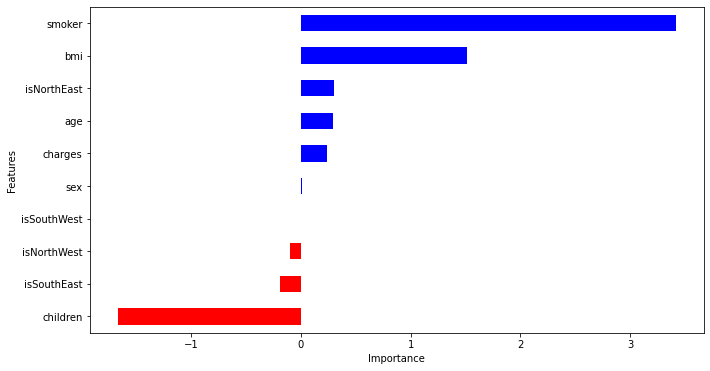

In [75]:
coeff = list(classifier.coef_[0])
labels = list(df[col])
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')